In [20]:
from datetime import datetime, date, time, timedelta
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

In [21]:
n = 2
dist = 200 * n
kml_G = 13.0
price_LG = 7.9
kml_E = 11.5
price_LE = 5.7
capacity = 50

### Fuel calculations
* `Autonomy (Km)`: The distance the car can go when the tank is full
* `Km/autonomy`: The ratio between the distance and the autonomy
* `L/100 Km`: Liters per 100 Km
* `R$/Km`: The cost per Km
* `R$/fill`: The cost to get the tank full
* `R$/100 Km`: The cost to go 100 Km
* `Volume (L)`: The amount of fuel needed
* `Cost (R$)`: The cost of the fuel
* `R$ ratio`: Price ratio between the fuels
* `Km ratio`: Km ration each fuel can go

In [22]:
df_fuel = pd.DataFrame(
	{
		'Fuel'				: ['Gasoline', 'Ethanol'],
		'R$/L'				: [price_LG, price_LE],
		'Km/L'				: [kml_G, kml_E]
	}
)

df_fuel['Autonomy (Km)']	= capacity * df_fuel['Km/L']
df_fuel['Km/autonomy']		= round(dist / df_fuel['Autonomy (Km)'], 1)
df_fuel['L/100 Km'] 		= round(100 / df_fuel['Km/L'], 1)
df_fuel['R$/Km']			= round(df_fuel['R$/L'] / df_fuel['Km/L'], 2)
df_fuel['R$/fill']			= round(df_fuel['R$/L'] * capacity, 2)
df_fuel['R$/100 Km']		= round(df_fuel['R$/L'] * df_fuel['L/100 Km'], 2)
df_fuel['Volume (L)']		= round(dist / df_fuel['Km/L'], 1)
df_fuel['Cost (R$)']		= round(df_fuel['R$/L'] * df_fuel['Volume (L)'], 2)
df_fuel['R$ ratio']			= [round(price_LG / price_LE, 3), round(price_LE / price_LG, 3)]
df_fuel['Km ratio']			= [round(kml_G / kml_E, 3), round(kml_E / kml_G, 3)]

In [23]:
one_way = int(dist / n)
avg_speed = 80

### Trip calculations
* `Distance (Km)`: Trip distance
* `AVG speed (Km/h)`: Average trip speed
* `Departure time`: Date and time the trip starts
* `Arrival time`: Estimated date and time the trip ends
* `Elapsed time`: Trip total duration
* `Elapsed time hh:mm:ss`: Trip total duration in the format hh:mm:ss

In [24]:
df_trip = pd.DataFrame(
	{
		'Distance (Km)'		: [one_way],
		'AVG speed (Km/h)'	: [avg_speed],
		# 'Departure time'	: [datetime.combine(datetime(2022, 4, 28), time(7, 0, 0))]
		'Departure time'	: [datetime.combine(date.today(), time(7, 0, 0))]
	}
)
df_trip['Arrival time'] = df_trip['Departure time'] + timedelta(seconds = int((df_trip['Distance (Km)'] / df_trip['AVG speed (Km/h)']) * 3600))
df_trip['Elapsed time'] = df_trip['Arrival time'] - df_trip['Departure time']
df_time = pd.to_timedelta(df_trip['Elapsed time']).dt.components[['days', 'hours', 'minutes', 'seconds']]
df_time['hours'] = df_time['hours'].add(df_time.pop('days') * 24)
df_trip['Elapsed time hh:mm:ss'] = df_time.astype(str).agg(lambda s: ':'.join(s.str.zfill(2)), axis=1)

### Fuel costs

In [25]:
print ('Fuel costs')
print ('Tank capacity:', capacity, 'L | Distance:', dist, 'Km')
df_fuel

Fuel costs
Tank capacity: 50 L | Distance: 400 Km


,Fuel,R$/L,Km/L,Autonomy (Km),Km/autonomy,L/100 Km,R$/Km,R$/fill,R$/100 Km,Volume (L),Cost (R$),R$ ratio,Km ratio
0,Gasoline,7.9,13.0,650.0,0.6,7.7,0.61,395.0,60.83,30.8,243.32,1.386,1.130
1,Ethanol,5.7,11.5,575.0,0.7,8.7,0.50,285.0,49.59,34.8,198.36,0.722,0.885


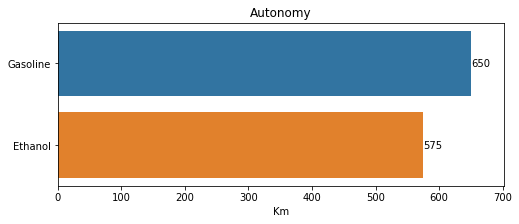

In [58]:
plt.figure(figsize=(8,3))
ax = sns.barplot(data=df_fuel, x='Autonomy (Km)', y='Fuel')
ax.set_title('Autonomy')
ax.set_xlabel("Km")
ax.set_ylabel(None)
ax.margins(x=0.08)
ax.bar_label(ax.containers[0])
plt.show()

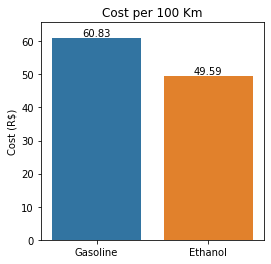

In [56]:
plt.figure(figsize=(4,4))
ax = sns.barplot(
	data=df_fuel,
	x='Fuel',
	y='R$/100 Km'
)
ax.set_title('Cost per 100 Km')
ax.set_xlabel(None)
ax.set_ylabel("Cost (R$)")
ax.margins(y=0.08)
ax.bar_label(ax.containers[0])
plt.show()

### Information

In [28]:
print('Trip calculations')
df_trip

Trip calculations


,Distance (Km),AVG speed (Km/h),Departure time,Arrival time,Elapsed time,Elapsed time hh:mm:ss
0,200,80,2022-05-05 07:00:00,2022-05-05 09:30:00,0 days 02:30:00,02:30:00


In [29]:
print("Fuel's lowest value")
df_fuel[df_fuel['R$/Km'] == df_fuel['R$/Km'].min()]

Fuel's lowest value


,Fuel,R$/L,Km/L,Autonomy (Km),Km/autonomy,L/100 Km,R$/Km,R$/fill,R$/100 Km,Volume (L),Cost (R$),R$ ratio,Km ratio
1,Ethanol,5.7,11.5,575.0,0.7,8.7,0.5,285.0,49.59,34.8,198.36,0.722,0.885


In [30]:
print("Fuel's highest value")
df_fuel[df_fuel['R$/Km'] == df_fuel['R$/Km'].max()]

Fuel's highest value


,Fuel,R$/L,Km/L,Autonomy (Km),Km/autonomy,L/100 Km,R$/Km,R$/fill,R$/100 Km,Volume (L),Cost (R$),R$ ratio,Km ratio
0,Gasoline,7.9,13.0,650.0,0.6,7.7,0.61,395.0,60.83,30.8,243.32,1.386,1.13


In [31]:
print('Trip with the cheapest fuel')
df_cheaper = df_fuel[df_fuel['R$/Km'] == df_fuel['R$/Km'].min()].reset_index()
pd.concat([df_cheaper, df_trip], axis=1)

Trip with the cheapest fuel


,index,Fuel,R$/L,Km/L,Autonomy (Km),Km/autonomy,L/100 Km,R$/Km,R$/fill,R$/100 Km,Volume (L),Cost (R$),R$ ratio,Km ratio,Distance (Km),AVG speed (Km/h),Departure time,Arrival time,Elapsed time,Elapsed time hh:mm:ss
0,1,Ethanol,5.7,11.5,575.0,0.7,8.7,0.5,285.0,49.59,34.8,198.36,0.722,0.885,200,80,2022-05-05 07:00:00,2022-05-05 09:30:00,0 days 02:30:00,02:30:00


In [32]:
print('Trip with the most expensive fuel')
df_cheaper = df_fuel[df_fuel['R$/Km'] == df_fuel['R$/Km'].max()].reset_index()
pd.concat([df_cheaper, df_trip], axis=1)

Trip with the most expensive fuel


,index,Fuel,R$/L,Km/L,Autonomy (Km),Km/autonomy,L/100 Km,R$/Km,R$/fill,R$/100 Km,Volume (L),Cost (R$),R$ ratio,Km ratio,Distance (Km),AVG speed (Km/h),Departure time,Arrival time,Elapsed time,Elapsed time hh:mm:ss
0,0,Gasoline,7.9,13.0,650.0,0.6,7.7,0.61,395.0,60.83,30.8,243.32,1.386,1.13,200,80,2022-05-05 07:00:00,2022-05-05 09:30:00,0 days 02:30:00,02:30:00


In [33]:
print("Trip with the highest autonomy fuel")
df_most_autonomy = df_fuel[df_fuel['Autonomy (Km)'] == df_fuel['Autonomy (Km)'].max()].reset_index()
pd.concat([df_most_autonomy, df_trip], axis=1)

Trip with the highest autonomy fuel


,index,Fuel,R$/L,Km/L,Autonomy (Km),Km/autonomy,L/100 Km,R$/Km,R$/fill,R$/100 Km,Volume (L),Cost (R$),R$ ratio,Km ratio,Distance (Km),AVG speed (Km/h),Departure time,Arrival time,Elapsed time,Elapsed time hh:mm:ss
0,0,Gasoline,7.9,13.0,650.0,0.6,7.7,0.61,395.0,60.83,30.8,243.32,1.386,1.13,200,80,2022-05-05 07:00:00,2022-05-05 09:30:00,0 days 02:30:00,02:30:00
